# Task: Build a Regression classifier to predict whether an email in spam or not based on features such as word frequency and email length.

- Load the dataset and split it into training and testing tests
- Train the Logistic Regression model to classify emails as spam or not spam
- Evaluate the model using accuracy, confusion matrix, precission, recall, and F1-score
- Visualize the confusion matrix using Seaborn's Heatmap

Accuracy: 0.87
Precision: 0.70
Recall: 1.00
F1 Score: 0.82


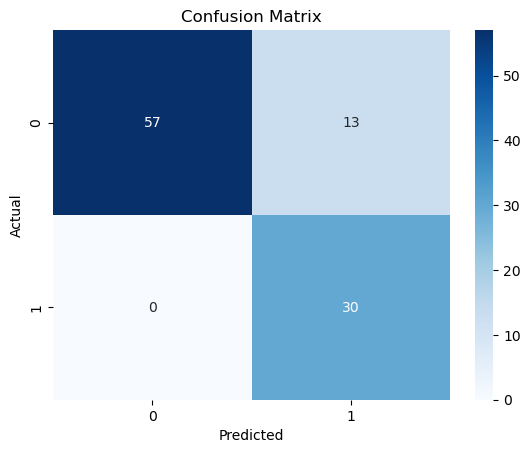

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Load dataset and drop 'Email No.' column
data = pd.read_csv('spam_data.csv')
data_cleaned = data.drop(columns=["Email No."])

# Sample 500 rows to reduce memory usage
data_sampled = data_cleaned.sample(n=500, random_state=42)

# Split features and target variable
X_sampled = data_sampled.drop(columns=["Prediction"])
y_sampled = data_sampled["Prediction"]

# Select the 300 best features using chi2 test
selector = SelectKBest(score_func=chi2, k=300)
X_selected = selector.fit_transform(X_sampled, y_sampled)

# Convert to sparse matrix to reduce memory usage
X_sparse = csr_matrix(X_selected)

# Train-test split with sparse matrix
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y_sampled, test_size=0.2, random_state=42)

# Train model with memory-efficient settings
model = SGDClassifier(loss='log_loss', alpha=0.001, class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()